# Appendix B. Electromagnetic pressure calculation. Electric mode

Let's consider rectangular resonator with size $a \times b \times h$.

In [1]:
from IPython.display import display, Math, Latex

def disp(ex):
    latex_ex = latex(ex)
    display(Math(latex_ex))

mu = var('mu')
assume(mu, 'real')
assume(mu>0)

epsilon = var('epsilon')
assume(epsilon, 'real')
assume(epsilon>0)

k_1 = var ('k_x')
assume(k_1, 'real')

k_2 = var ('k_y')
assume(k_2, 'real')

k_3 = var ('k_z')
assume(k_3, 'real')

n_1 = var ('n_x')
assume(n_1, 'real')
assume(n_1, 'integer')

n_2 = var ('n_y')
assume(n_2, 'real')
assume(n_2, 'integer')

n_3 = var ('n_z')
assume(n_3, 'real')
assume(n_3, 'integer')

a = var('a')
assume(a, 'real')
assume(a>0)

b = var('b')
assume(b, 'real')
assume(b>0)

h = var('h')
assume(h, 'real')
assume(h>0)

x = var('x')
y = var('y')
z = var('z')

assume(x, 'real')
assume(y, 'real')
assume(z, 'real')

c = var('c')
assume(c, 'real')
assume(c>0)

omega = var('omega')
assume(omega, 'real')

In [2]:
k_subs_z = [k_3 == n_3 * pi / h]

In [3]:
k_subs_xy = [k_1 == n_1 * pi / a, k_2 == n_2 * pi / b]

In electric mode $\nabla\,\vec{E} + \frac{\omega^2}{c^2}\,\vec{E} = 0$ we have the following 

In [4]:
A_1 = var ('A_x')
A_2 = var ('A_y')
A_3 = var ('A_z')

In [5]:
# выражения для электрического поля

e_x = cos(k_1*x)*sin(k_2*y)*sin(k_3*z)
e_y = sin(k_1*x)*cos(k_2*y)*sin(k_3*z)
e_z = sin(k_1*x)*sin(k_2*y)*cos(k_3*z)

In [6]:
# выражения для электрического поля

E_x = A_1*e_x
E_y = A_2*e_y
E_z = A_3*e_z

In [7]:
disp(E_x.subs(k_subs_xy))
disp(E_y.subs(k_subs_xy))
disp(E_z.subs(k_subs_xy))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

$$E_{x} = A_{x} \cos\left(\frac{\pi n_{x} x}{a}\right) \sin\left(\frac{\pi n_{y} y}{b}\right) \sin\left(k_{z} z\right)$$
$$E_{y} = A_{y} \cos\left(\frac{\pi n_{y} y}{b}\right) \sin\left(\frac{\pi n_{x} x}{a}\right) \sin\left(k_{z} z\right)$$
$$E_{z} = A_{z} \cos\left(k_{z} z\right) \sin\left(\frac{\pi n_{x} x}{a}\right) \sin\left(\frac{\pi n_{y} y}{b}\right)$$


$rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\,\vec{H}$

In [8]:
rotE_x = E_z.diff(y) - E_y.diff(z)
rotE_y = E_x.diff(z) - E_z.diff(x)
rotE_z = E_y.diff(x) - E_x.diff(y)

In [9]:
H_x = c / (I * omega * mu) * rotE_x
H_y = c / (I * omega * mu) * rotE_y
H_z = c / (I * omega * mu) * rotE_z

In [10]:
H_x = H_x.full_simplify().factor().subs(k_subs_xy)
H_y = H_y.full_simplify().factor().subs(k_subs_xy)
H_z = H_z.full_simplify().factor().subs(k_subs_xy)

In [11]:
display(Math(latex(H_x)))
display(Math(latex(H_y)))
display(Math(latex(H_z)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

and 

$$H_{x} = \frac{i \, {\left(A_{y} b k_{z} - \pi A_{z} n_{y}\right)} c \cos\left(\frac{\pi n_{y} y}{b}\right) \cos\left(k_{z} z\right) \sin\left(\frac{\pi n_{x} x}{a}\right)}{b \mu \omega}$$
$$H_{y} = -\frac{i \, {\left(A_{x} k_{z} - \frac{\pi A_{z} n_{x}}{a}\right)} c \cos\left(\frac{\pi n_{x} x}{a}\right) \cos\left(k_{z} z\right) \sin\left(\frac{\pi n_{y} y}{b}\right)}{\mu \omega}$$
$$H_{z} = -\frac{i \, {\left(\frac{\pi A_{y} n_{x}}{a} - \frac{\pi A_{x} n_{y}}{b}\right)} c \cos\left(\frac{\pi n_{x} x}{a}\right) \cos\left(\frac{\pi n_{y} y}{b}\right) \sin\left(k_{z} z\right)}{\mu \omega}$$

In [12]:
eqE_x = E_x.diff(x,2) + E_x.diff(y,2) + E_x.diff(z,2) + mu*epsilon*omega^2/c^2 * E_x == 0
eqE_y = E_y.diff(x,2) + E_y.diff(y,2) + E_y.diff(z,2) + mu*epsilon*omega^2/c^2 * E_y == 0
eqE_z = E_z.diff(x,2) + E_z.diff(y,2) + E_z.diff(z,2) + mu*epsilon*omega^2/c^2 * E_z == 0

In [13]:
eqH_x = H_x.diff(x,2) + H_x.diff(y,2) + H_x.diff(z,2) + mu*epsilon*omega^2/c^2 * H_x == 0
eqH_y = H_y.diff(x,2) + H_y.diff(y,2) + H_y.diff(z,2) + mu*epsilon*omega^2/c^2 * H_y == 0
eqH_z = H_z.diff(x,2) + H_z.diff(y,2) + H_z.diff(z,2) + mu*epsilon*omega^2/c^2 * H_z == 0

In [14]:
dispersion_eqH = (eqH_z.full_simplify().factor().lhs().operands()[1]/c^2).expand() == 0
disp(dispersion_eqH)

<IPython.core.display.Math object>

In [15]:
dispersion_eqE = (eqE_z.full_simplify().factor().lhs().operands()[0]/c^2).expand() == 0
disp(dispersion_eqE)

<IPython.core.display.Math object>

with

$$k_{z}^{2} + \frac{\pi^{2} n_{x}^{2}}{a^{2}} + \frac{\pi^{2} n_{y}^{2}}{b^{2}} - \frac{\omega^{2}}{c^{2}} = 0$$

using $div\,\vec{E} = 0$ we have

In [16]:
div_E = E_x.diff(x) + E_y.diff(y) + E_z.diff(z)
eq_A = div_E.full_simplify().factor().operands()[0] == 0
disp(eq_A)

<IPython.core.display.Math object>

In [17]:
eq_A = eq_A.subs(k_subs_xy)
disp(eq_A)

<IPython.core.display.Math object>

$$A_{z} k_{z} + \frac{\pi A_{x} n_{x}}{a} + \frac{\pi A_{y} n_{y}}{b} = 0$$

In [18]:
omega_2 = solve(eqE_x, omega^2)[0]
omega_1 = solve(eqE_x, omega)[1]
disp(omega_1)

<IPython.core.display.Math object>

Field energy density $\left(\int \frac{E_x^2+E_y^2+E_z^2}{8 \pi}dV\right)\big/{V}$ is

In [19]:
E_E = (((E_x^2+E_y^2+E_z^2)/(8*pi)) \
       .subs(omega_1).subs(k_subs_xy).subs(k_subs_z) \
       .subs(epsilon == 1, mu == 1) \
       .integrate(x, 0, a).integrate(y, 0, b).integrate(z, 0, h) \
       .subs(omega_2)/(a*b*h)).expand().full_simplify()
disp(E_E)

<IPython.core.display.Math object>

$$\frac{E}{V} = \frac{{A_{1}^{2} + A_{2}^{2} + A_{3}^{2}}}{64 \, \pi}$$

Full field energy density $\left(\int \frac{E_x^2+E_y^2+E_z^2}{8 \pi}dV + \int \frac{H_x^2+H_y^2+H_z^2}{8 \pi}dV\right)\big/{V}$ is

$$\frac{E}{V} = \frac{{A_{1}^{2} + A_{2}^{2} + A_{3}^{2}}}{32 \, \pi}$$

Electromagnetic pressure $\frac{\int \frac {H_x^2+H_y^2}{8 \pi} dS}{S}$ on $xy$ plate is

In [20]:
F_z = -(((H_x^2+H_y^2)/(8*pi)) \
       .subs(omega_1).subs(omega_2).subs(k_subs_xy) \
       .subs(epsilon == 1, mu == 1) \
       .integrate(x, 0, a).integrate(y, 0, b).subs(z == 0) \
       /(a*b)).factor().full_simplify()
disp(F_z)
print ("\\frac{f_z}{S} = "+latex(F_z))

<IPython.core.display.Math object>

\frac{f_z}{S} = -\frac{2 \, \pi A_{x} A_{z} a b^{2} k_{z} n_{x} - \pi^{2} A_{z}^{2} b^{2} n_{x}^{2} + 2 \, \pi A_{y} A_{z} a^{2} b k_{z} n_{y} - \pi^{2} A_{z}^{2} a^{2} n_{y}^{2} - {\left(A_{x}^{2} + A_{y}^{2}\right)} a^{2} b^{2} k_{z}^{2}}{32 \, {\left(\pi a^{2} b^{2} k_{z}^{2} + \pi^{3} b^{2} n_{x}^{2} + \pi^{3} a^{2} n_{y}^{2}\right)}}


$$\frac{f_z}{S} = -\frac{2 \, \pi A_{x} A_{z} a b^{2} k_{z} n_{x} - \pi^{2} A_{z}^{2} b^{2} n_{x}^{2} + 2 \, \pi A_{y} A_{z} a^{2} b k_{z} n_{y} - \pi^{2} A_{z}^{2} a^{2} n_{y}^{2} - {\left(A_{x}^{2} + A_{y}^{2}\right)} a^{2} b^{2} k_{z}^{2}}{32 \, {\left(\pi a^{2} b^{2} k_{z}^{2} + \pi^{3} b^{2} n_{x}^{2} + \pi^{3} a^{2} n_{y}^{2}\right)}}$$

Their relation $\frac{f_z/S}{E/V}$ is

In [21]:
F_z_E = (F_z / (E_E) / 2).factor()
disp(F_z_E)
print ("\\frac{f_z/S}{E/V} = "+latex(F_z_E))

<IPython.core.display.Math object>

\frac{f_z/S}{E/V} = \frac{A_{x}^{2} a^{2} b^{2} k_{z}^{2} + A_{y}^{2} a^{2} b^{2} k_{z}^{2} - 2 \, \pi A_{x} A_{z} a b^{2} k_{z} n_{x} + \pi^{2} A_{z}^{2} b^{2} n_{x}^{2} - 2 \, \pi A_{y} A_{z} a^{2} b k_{z} n_{y} + \pi^{2} A_{z}^{2} a^{2} n_{y}^{2}}{{\left(a^{2} b^{2} k_{z}^{2} + \pi^{2} b^{2} n_{x}^{2} + \pi^{2} a^{2} n_{y}^{2}\right)} {\left(A_{x}^{2} + A_{y}^{2} + A_{z}^{2}\right)}}


$$\frac{f_z/S}{E/V} = \frac{A_{x}^{2} a^{2} b^{2} k_{z}^{2} + A_{y}^{2} a^{2} b^{2} k_{z}^{2} - 2 \, \pi A_{x} A_{z} a b^{2} k_{z} n_{x} + \pi^{2} A_{z}^{2} b^{2} n_{x}^{2} - 2 \, \pi A_{y} A_{z} a^{2} b k_{z} n_{y} + \pi^{2} A_{z}^{2} a^{2} n_{y}^{2}}{{\left(a^{2} b^{2} k_{z}^{2} + \pi^{2} b^{2} n_{x}^{2} + \pi^{2} a^{2} n_{y}^{2}\right)} {\left(A_{x}^{2} + A_{y}^{2} + A_{z}^{2}\right)}}$$

Considering terms with wave propagation in $z$ direction we have $H_z = 0$ which give:

In [22]:
eq_Hz0 = H_z == 0

In [23]:
eq_Hz_0 = eq_Hz0.lhs().numerator().operands()[0] == 0

In [24]:
eq_Hz_0 = eq_Hz_0.subs(k_subs_xy)
disp(eq_Hz_0)
print (latex(eq_Hz_0))

<IPython.core.display.Math object>

\pi A_{y} b n_{x} - \pi A_{x} a n_{y} = 0


$$\pi A_{y} b n_{x} - \pi A_{x} a n_{y} = 0$$

In [25]:
A1_sol_z = solve(eq_A.subs(solve(eq_Hz_0, A_2)), A_1)[0].rhs()
A2_sol_z = solve(eq_A.subs(solve(eq_Hz_0, A_1)), A_2)[0].rhs()
disp(A1_sol_z)
disp(A2_sol_z)
print (latex(A_1 == A1_sol_z))
print (latex(A_2 == A2_sol_z))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

A_{x} = -\frac{A_{z} a b^{2} k_{z} n_{x}}{\pi b^{2} n_{x}^{2} + \pi a^{2} n_{y}^{2}}
A_{y} = -\frac{A_{z} a^{2} b k_{z} n_{y}}{\pi b^{2} n_{x}^{2} + \pi a^{2} n_{y}^{2}}


$$A_{x} = -\frac{A_{z} a b^{2} k_{z} n_{x}}{\pi b^{2} n_{x}^{2} + \pi a^{2} n_{y}^{2}},
A_{y} = -\frac{A_{z} a^{2} b k_{z} n_{y}}{\pi b^{2} n_{x}^{2} + \pi a^{2} n_{y}^{2}}$$

Relation of electromagnetic pressure per field energy density in this case is equial to

In [26]:
F_z_E_z = F_z_E.subs(A_1 == A1_sol_z, A_2 == A2_sol_z).factor()
disp(F_z_E_z)

<IPython.core.display.Math object>

$$\frac{f_z/S}{E/V} = 1$$

Considering terms with wave propagation in $x$ direction we have $H_x = 0$ which give:

In [27]:
eq_Hx0 = H_x == 0
disp(eq_Hx0)
eq_Hx_0 = eq_Hx0.lhs().numerator().operands()[0] == 0
disp(eq_Hx_0)
eq_Hx_0 = eq_Hx_0.subs(k_subs_xy)
disp(eq_Hx_0)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [28]:
A3_sol_x = solve(eq_A.subs(solve(eq_Hx_0, A_2)), A_3)[0].rhs()
A2_sol_x = solve(eq_A.subs(solve(eq_Hx_0, A_3)), A_2)[0].rhs()
disp(A3_sol_x)
disp(A2_sol_x)
print (latex(A_3 == A3_sol_x))
print (latex(A_2 == A2_sol_x))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

A_{z} = -\frac{\pi A_{x} b^{2} k_{z} n_{x}}{a b^{2} k_{z}^{2} + \pi^{2} a n_{y}^{2}}
A_{y} = -\frac{\pi^{2} A_{x} b n_{x} n_{y}}{a b^{2} k_{z}^{2} + \pi^{2} a n_{y}^{2}}


$$A_{z} = -\frac{\pi A_{x} b^{2} k_{z} n_{x}}{a b^{2} k_{z}^{2} + \pi^{2} a n_{y}^{2}},
A_{y} = -\frac{\pi^{2} A_{x} b n_{x} n_{y}}{a b^{2} k_{z}^{2} + \pi^{2} a n_{y}^{2}}$$

Relation of electromagnetic pressure per field energy density in this case is

In [29]:
F_z_E_x = F_z_E.subs(A_3 == A3_sol_x, A_2 == A2_sol_x).subs(k_subs_xy).factor()
disp(F_z_E_x)
print("\\frac{f_z/S}{E/V} = "+latex(F_z_E_x))

<IPython.core.display.Math object>

\frac{f_z/S}{E/V} = \frac{b^{2} k_{z}^{2}}{b^{2} k_{z}^{2} + \pi^{2} n_{y}^{2}}


$$\frac{f_z/S}{E/V} = \frac{b^{2} k_{z}^{2}}{b^{2} k_{z}^{2} + \pi^{2} n_{y}^{2}}$$

Considering terms with wave propagation in $y$ direction $H_y = 0$ is similar to them in $x$ direction

In [30]:
eq_Hy0 = H_y == 0
disp(eq_Hy0)
eq_Hy_0 = eq_Hy0.lhs().numerator().operands()[0] == 0
disp(eq_Hy_0)
eq_Hy_0 = eq_Hy_0.subs(k_subs_xy)
disp(eq_Hy_0)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [31]:
A1_sol_y = solve(eq_A.subs(solve(eq_Hy_0, A_3)), A_1)[0].rhs()
A3_sol_y = solve(eq_A.subs(solve(eq_Hy_0, A_1)), A_3)[0].rhs()
disp(A1_sol_y)
disp(A3_sol_y)
print (latex(A_1 == A1_sol_y))
print (latex(A_3 == A3_sol_y))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

A_{x} = -\frac{\pi^{2} A_{y} a n_{x} n_{y}}{a^{2} b k_{z}^{2} + \pi^{2} b n_{x}^{2}}
A_{z} = -\frac{\pi A_{y} a^{2} k_{z} n_{y}}{a^{2} b k_{z}^{2} + \pi^{2} b n_{x}^{2}}


$$A_{x} = -\frac{\pi^{2} A_{y} a n_{x} n_{y}}{a^{2} b k_{z}^{2} + \pi^{2} b n_{x}^{2}},
A_{z} = -\frac{\pi A_{y} a^{2} k_{z} n_{y}}{a^{2} b k_{z}^{2} + \pi^{2} b n_{x}^{2}}$$

Relation of electromagnetic pressure per field energy density in this case is

In [32]:
F_z_E_y = F_z_E.subs(A_1 == A1_sol_y, A_3 == A3_sol_y).subs(k_subs_xy).factor()
disp(F_z_E_y)
print("\\frac{f_z/S}{E/V} = " + latex(F_z_E_y))

<IPython.core.display.Math object>

\frac{f_z/S}{E/V} = \frac{a^{2} k_{z}^{2}}{a^{2} k_{z}^{2} + \pi^{2} n_{x}^{2}}


$$\frac{f_z/S}{E/V} = \frac{a^{2} k_{z}^{2}}{a^{2} k_{z}^{2} + \pi^{2} n_{x}^{2}}$$

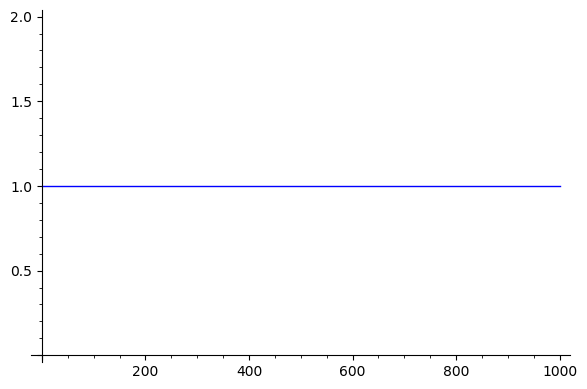

In [33]:
plot(F_z_E_z.subs(a == 0.0001, n_x == 1000, n_y == 1000), k_z, 0, 1000)

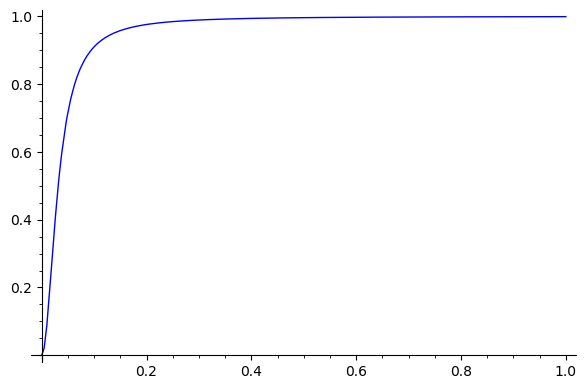

In [34]:
plot(F_z_E_x.subs(b == 0.0001, n_x == 1000, n_y == 1000), k_z, 0, 1000000000)

In [35]:
limit(F_z_E_x, k_z=Infinity)

1

In [36]:
limit(F_z_E_y, k_z=Infinity)

1

In [37]:
limit(F_z_E_z, k_z=Infinity)

1